In [1]:
import rasterio
import rasterio.plot
import rasterio.mask

import pyproj
import numpy as np
import matplotlib.pyplot as plt

import fiona

from matplotlib import pyplot
from descartes import PolygonPatch

In [2]:
filepath_shape = 'gis/catchment.shp'
with fiona.open(filepath_shape, "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]


In [3]:
print(shapes)

In [4]:
filepath_raster = 'gis/samoylov_surface_classification_lowres.tif'
with rasterio.open(filepath_raster) as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta
     

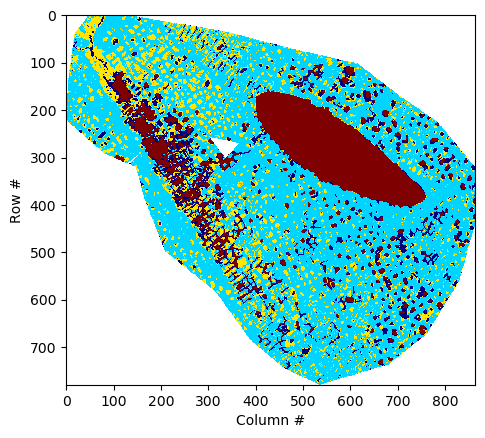

In [13]:
#mask the nan values which are defined as 255
masked_array = np.ma.masked_where(out_image[0,:,:] == 255, out_image[0,:,:])

#set colormap with masked values set to white
cmap = plt.cm.get_cmap("jet")
cmap.set_bad(color='white')

#plot the raster map
plt.imshow(masked_array, cmap=cmap)
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

In [12]:
#get pixel size in [m] (coordiate system is epsg -> UTM)
pixelSizeX = out_meta['transform'][0]
pixelSizeY =-out_meta['transform'][4]

#define surface classes
surface_classes = {
  "water": 1,
  "dry": 2,
  "wet": 3,
  "submerged vegetation": 4,
}

#calculate area for each surfac class    
for key in surface_classes:
    pixel_no = np.sum((out_image[0,:,:] == surface_classes[key]))
    area = pixel_no * pixelSizeX * pixelSizeY  #surface area [m²]
    print('The area of class: ' + key + ' is: ' + str(area) + ' m²' )

The area of class: water is: 36954.0 m²
The area of class: dry is: 256471.0 m²
The area of class: wet is: 70203.0 m²
The area of class: submerged vegetation is: 64449.0 m²
